In [2]:
import pandas as pd
import numpy as np
import glob
import os
import re
import math
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import container
%matplotlib widget

In [3]:
path_R2 = Path('../data/raw/XRD/Re0.1Mo0.9B2_HPXRD_run2_300_20220710/mask&dat&fxye/') #path for Run 2
path_R3 = Path('../data/raw/XRD/Re0.1Mo0.9B2_HPXRD_run3_150_20230228/mask&dat&fxye/') #path for Run 3

In [4]:
data_dict = {}

for file in path_R2.iterdir() :
    if str(file).endswith('.dat'):
        file_num = int(re.split('_', str(file.name))[0]) 
        data_dict[file_num] = pd.read_csv(
        file,
        delimiter='  ',
        usecols=[0, 1],
        skiprows=[0],
        names=['theta2','intensity'], engine = 'python'
        ).dropna()

In [5]:
data_dict = dict(sorted(data_dict.items()))

In [6]:
data_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [7]:
P = [0,6,9.5,18,24,28,36,41,47,48,55,59,62,65,68,71,73,56,48,36,25]  #pressure values corresponding to the dict keys/file numbers.

Text(9.12, 3950, '')

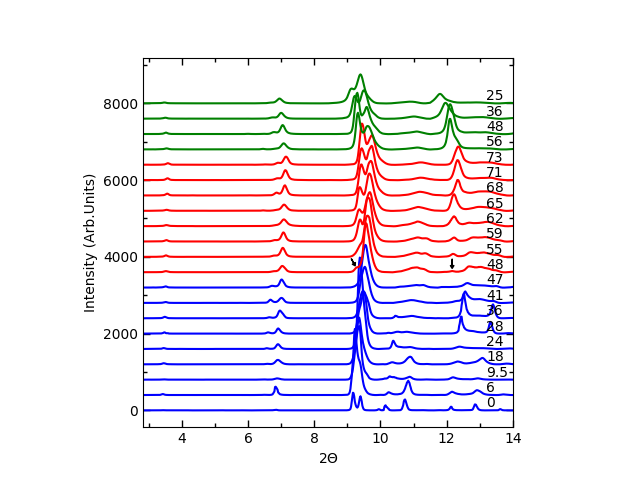

In [8]:
fig, ax = plt.subplots()
ax.set_box_aspect(1)
offset =0
i= 0
for file in data_dict.keys(): #Plotting Unloading data files
        df = data_dict[file]
        if i < 9:
            ax.plot(df.theta2, df.intensity+offset, color = 'b')
        elif i>=9 and i<17:
            ax.plot(df.theta2, df.intensity+offset, color = 'r')
        else:
            ax.plot(df.theta2, df.intensity+offset, color = 'g')
                    
        ax.text(13.2, 80+offset, P[i])
        offset = offset+400
        i=i+1;
        
        
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = True)
ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = True)
ax.set_xlabel('2$\Theta$')
ax.set_ylabel('Intensity (Arb.Units)')
ax.set_xlim(2.83,14)
prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
ax.annotate("",xy= (12.167,3700),xytext = (12.167, 3941), arrowprops=dict(headwidth=2.5, headlength=2, width=0.02,color ='k'))
ax.annotate("", xy = (9.237,3767), xytext=(9.120,3950), arrowprops = dict(headwidth=2.5, headlength=2, width=0.02,color ='k'))


In [9]:
plt.savefig('../publication_ready/ReMoB2_XRD_Run1.pdf')

In [10]:
plt.close('all')

## Contour plotting of XRD

In [11]:
#
Z= []
Y = (data_dict[1].theta2).array
X = np.array(P[0:17])
for i in data_dict.keys():
    if i<18:
        Z.append(data_dict[i].intensity.array)
    else:
        continue
Z = np.array(Z).transpose()

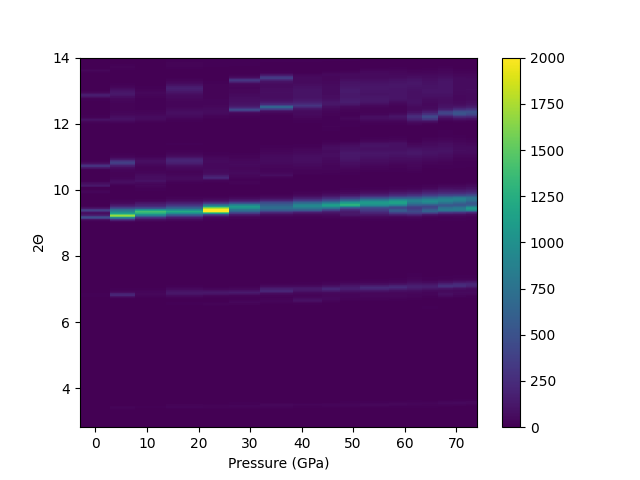

In [12]:
fig,ax = plt.subplots(1, 1)

  
# plots filled contour plot
cf = ax.pcolor(X, Y,Z, vmin = 0, vmax= 2000, rasterized = True) #saving as .pdf puts white grids if raterized = False.https://www.google.com/search?channel=fs&client=ubuntu&q=what+is+bottom+of+peak+calledhttps://www.google.com/search?channel=fs&client=ubuntu&q=what+is+bottom+of+peak+called

  
ax.set_xlabel('Pressure (GPa)')
ax.set_ylabel('2$\Theta$')
ax.set_ylim(top = 14)
fig.colorbar(cf, ax=ax, label = 'Inter)
plt.show()

In [ ]:
plt.savefig('../publication_ready/Countour_Run1.pdf')

In [ ]:
plt.close('all')